<a href="https://colab.research.google.com/github/elenaajayi/Computer-Vision-Fundamentals---CUS-754/blob/main/Problem_Set_03/Problem_Set_03_TemplateMatching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is part the of Dr. Christoforos Christoforou's course materials. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials or any of their derivatives without the instructor's express written consent.

# Problem Set 03 - Template Matching
**Professor:** Dr. Christoforos Christoforou


In the course, we introduced template matching as one use-case, where we use **filters as feature extractors**. In particular, by using a small image of an object (template image) we want to detect as a kernel, and then calculating the cross-correlation of that kernel with the search image, we can obtain a 2D **intermediate representation** where each entry captures the similarity between the template image to each location of the search image.

Subsequently, by searching for local picks in the **intermediate representation** we are able to identify the specific location the query object is found in the search image.

In this problem set you are expected to practice the concepts covered in class.


## Exercise 1 Template matching using OpenCV

Template matching is a very common and useful technique in computer vision. OpenCV library provides two useful functions that implement template matching and object detections. These are the functions

* `cv2.matchTemplate()` which performs the convolution of the query image with the search image, and
* `cv2.matchTemplate()` which can identify the local maximum in the `intermediate representation`  

As part of this task, you are expected to read the [OpenCV tutorial](
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html) and reproduce the code shown therein.

Show an example, were you use the images provided by openCV and an example where you use your own images.

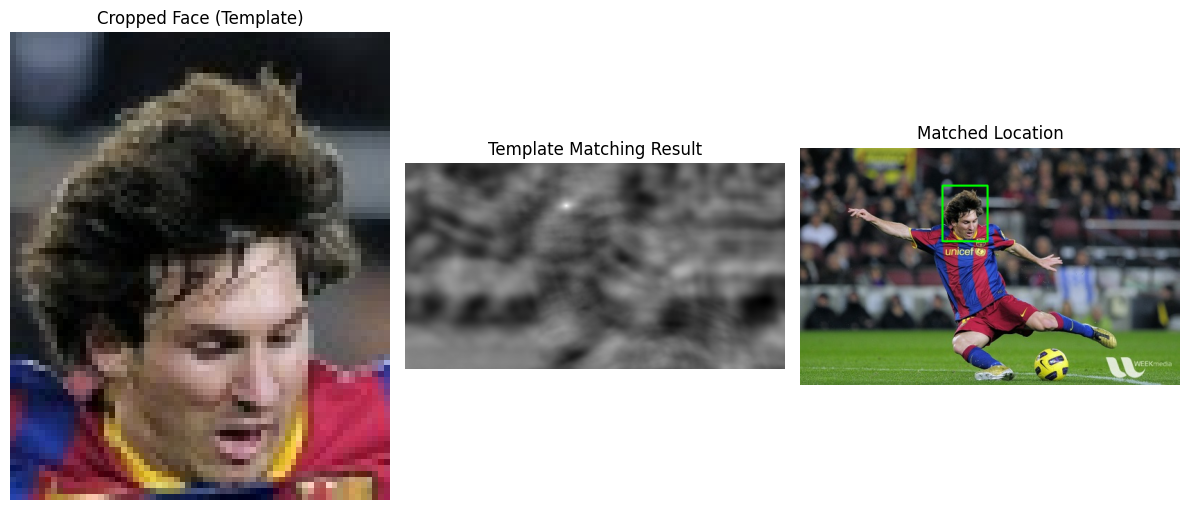

Best match top-left corner: (205, 55)
Match confidence (max_val): 1.0


In [52]:
# !pip install opencv-python-headless
import cv2 as cv         # OpenCV for image processing functions
import numpy as np       # NumPy for efficient array operations
import matplotlib.pyplot as plt  # Matplotlib for displaying images
import urllib.request    # For fetching the image from an online source

def url_to_image(url):
    """
    Downloads an image from a given URL and converts it into an OpenCV BGR image.

    Parameters:
        url (str): The URL of the image.

    Returns:
        image (numpy.ndarray): The image in OpenCV's BGR format.
    """
    resp = urllib.request.urlopen(url)
    image_data = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv.imdecode(image_data, cv.IMREAD_COLOR)
    return image

# --------------------------------------------------------------------------------
# Step 1: Load the Main Image
# --------------------------------------------------------------------------------
# We use the standard 'messi5.jpg' image from the OpenCV GitHub repository.
# This image is commonly used in OpenCV tutorials.
image_url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/messi5.jpg"
main_image = url_to_image(image_url)

# --------------------------------------------------------------------------------
# Step 2: Define the Template Coordinates
# --------------------------------------------------------------------------------
# These coordinates (x, y, w, h) have been determined from standard tutorials.
# They roughly correspond to Messi's face in the 'messi5.jpg' image.
x, y, w, h = 205, 55, 65, 80

# --------------------------------------------------------------------------------
# Step 3: Crop the Template Image (Messi's Face)
# --------------------------------------------------------------------------------
template_image = main_image[y:y+h, x:x+w]

# --------------------------------------------------------------------------------
# Step 4: Convert Images to Grayscale
# --------------------------------------------------------------------------------
# Template matching is typically performed on single-channel (grayscale) images.
main_gray = cv.cvtColor(main_image, cv.COLOR_BGR2GRAY)
template_gray = cv.cvtColor(template_image, cv.COLOR_BGR2GRAY)

# --------------------------------------------------------------------------------
# Step 5: Perform Template Matching
# --------------------------------------------------------------------------------
# We use the TM_CCOEFF_NORMED method for robust template matching.
result = cv.matchTemplate(main_gray, template_gray, cv.TM_CCOEFF_NORMED)

# --------------------------------------------------------------------------------
# Step 6: Locate the Best Match
# --------------------------------------------------------------------------------
# cv.minMaxLoc finds the best match in the result heatmap.
# For TM_CCOEFF_NORMED, the maximum value indicates the best match.
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# --------------------------------------------------------------------------------
# Step 7: Visualize the Results
# --------------------------------------------------------------------------------
# We avoid using any GUI window functions (like cv.imshow) to prevent crashes.
# Instead, we use Matplotlib to display the images.
matched_image = main_image.copy()
cv.rectangle(matched_image, top_left, bottom_right, (0, 255, 0), 2)

plt.figure(figsize=(12, 5))

# Display the cropped template (Messi's face)
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(template_image, cv.COLOR_BGR2RGB))
plt.title("Cropped Face (Template)")
plt.axis("off")

# Display the template matching result (heatmap)
plt.subplot(1, 3, 2)
plt.imshow(result, cmap='gray')
plt.title("Template Matching Result")
plt.axis("off")

# Display the main image with the matched region highlighted
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(matched_image, cv.COLOR_BGR2RGB))
plt.title("Matched Location")
plt.axis("off")

plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------------
# Final Output
# --------------------------------------------------------------------------------
print("Best match top-left corner:", top_left)
print("Match confidence (max_val):", max_val)

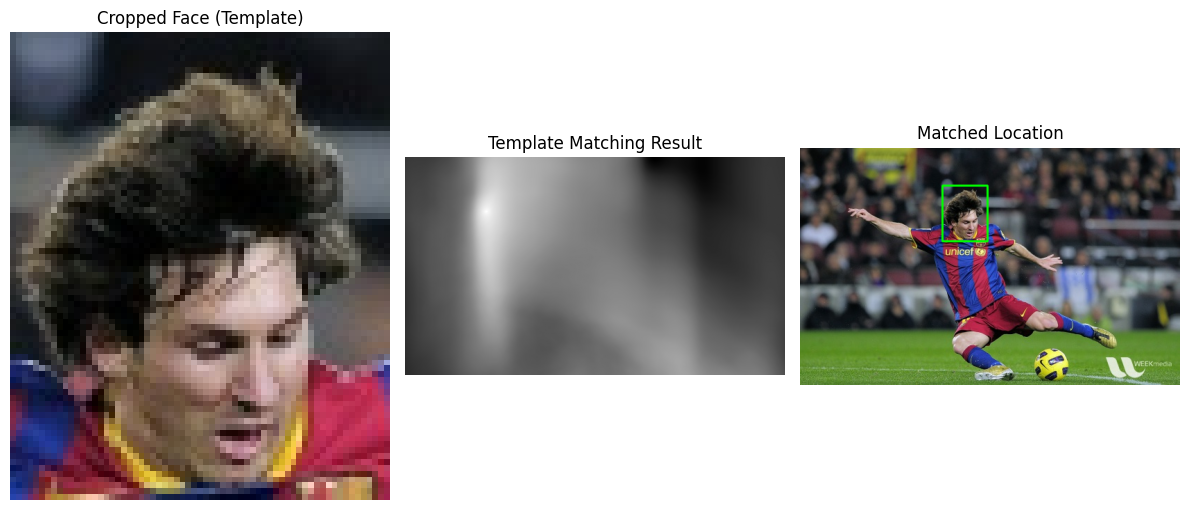

Best match top-left corner: (75, 50)
Match confidence (max_val): 1.0


In [53]:
#
# Use this cell to reproduce the tutorial code (Section - Template Matching with Multiple Objects)


# !pip install opencv-python-headless
import cv2 as cv         # OpenCV for image processing functions
import numpy as np       # NumPy for efficient array operations
import matplotlib.pyplot as plt  # Matplotlib for displaying images
import urllib.request    # For fetching the image from an online source

def url_to_image(url):
    """
    Downloads an image from a given URL and converts it into an OpenCV BGR image.

    Parameters:
        url (str): The URL of the image.

    Returns:
        image (numpy.ndarray): The image in OpenCV's BGR format.
    """
    resp = urllib.request.urlopen(url)
    image_data2 = np.asarray(bytearray(resp.read()), dtype="uint8")
    image2 = cv.imdecode(image_data2, cv.IMREAD_COLOR)
    return image2

# --------------------------------------------------------------------------------
# Step 1: Load the Main Image
# --------------------------------------------------------------------------------
# We use the standard 'messi5.jpg' image from the OpenCV GitHub repository.
# This image is commonly used in OpenCV tutorials.
image_url2 = "https://www.omlet.us/images/cache/512/341/york-chocolate-cat-looking-inquisitively.jpg"
main_image2 = url_to_image(image_url2)

# --------------------------------------------------------------------------------
# Step 2: Define the Template Coordinates
# --------------------------------------------------------------------------------
# These coordinates (x, y, w, h) have been determined from standard tutorials.
# They roughly correspond to Messi's face in the 'messi5.jpg' image.
x, y, w, h = 75, 50, 160, 140

# --------------------------------------------------------------------------------
# Step 3: Crop the Template Image (Messi's Face)
# --------------------------------------------------------------------------------
template_image2 = main_image2[y:y+h, x:x+w]

# --------------------------------------------------------------------------------
# Step 4: Convert Images to Grayscale
# --------------------------------------------------------------------------------
# Template matching is typically performed on single-channel (grayscale) images.
main_gray2 = cv.cvtColor(main_image2, cv.COLOR_BGR2GRAY)
template_gray2 = cv.cvtColor(template_image2, cv.COLOR_BGR2GRAY)

# --------------------------------------------------------------------------------
# Step 5: Perform Template Matching
# --------------------------------------------------------------------------------
# We use the TM_CCOEFF_NORMED method for robust template matching.
result = cv.matchTemplate(main_gray2, template_gray2, cv.TM_CCOEFF_NORMED)

# --------------------------------------------------------------------------------
# Step 6: Locate the Best Match
# --------------------------------------------------------------------------------
# cv.minMaxLoc finds the best match in the result heatmap.
# For TM_CCOEFF_NORMED, the maximum value indicates the best match.
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

# --------------------------------------------------------------------------------
# Step 7: Visualize the Results
# --------------------------------------------------------------------------------
# We avoid using any GUI window functions (like cv.imshow) to prevent crashes.
# Instead, we use Matplotlib to display the images.
matched_image2 = main_image2.copy()
cv.rectangle(matched_image2, top_left, bottom_right, (0, 255, 0), 2)

plt.figure(figsize=(12, 5))

# Display the cropped template (Messi's face)
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(template_image, cv.COLOR_BGR2RGB))
plt.title("Cropped Face (Template)")
plt.axis("off")

# Display the template matching result (heatmap)
plt.subplot(1, 3, 2)
plt.imshow(result, cmap='gray')
plt.title("Template Matching Result")
plt.axis("off")

# Display the main image with the matched region highlighted
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(matched_image, cv.COLOR_BGR2RGB))
plt.title("Matched Location")
plt.axis("off")

plt.tight_layout()
plt.show()

# --------------------------------------------------------------------------------
# Final Output
# --------------------------------------------------------------------------------
print("Best match top-left corner:", top_left)
print("Match confidence (max_val):", max_val)
#


## Exercise 2: Template matching from scratch

In this exercise, you will be writing your own function to implement template matching  from scratch. More specifically, you will implement the simplified version of the function `cv2.matchTemplate()`. You function need to perform template matching using normalized correlations (i.e. the method `CV_TM_CCORR_NORMED`). You can find the exact formula for the normalized correlation method [here](https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/template_matching/template_matching.html#how-does-it-work)




In [37]:
#
# Use this cell to implement your own version of matchTempalte() function

import numpy as np

def my_matchTemplate(image, template):
    """
    Performs template matching using normalized cross-correlation.

    This function slides a template image over a larger input image and
    calculates the similarity between the template and each region of the
    input image using normalized cross-correlation. The result is a map
    where higher values indicate better matches between the template and
    the corresponding image region.

    Args:
        image (numpy.ndarray): The input image (grayscale). This is the
                              larger image that will be searched for the
                              template. It should be a 2D NumPy array
                              representing a grayscale image.
        template (numpy.ndarray): The template image (grayscale). This is
                                 the smaller image that will be used to
                                 search within the input image. It should
                                 also be a 2D NumPy array representing a
                                 grayscale image.

    Returns:
        numpy.ndarray: The result map, also known as a correlation map or
                       heatmap. This is a 2D NumPy array where each element
                       represents the similarity between the template and the
                       corresponding region in the input image. Higher values
                       indicate a stronger match.

    Raises:
        TypeError: If either the image or template is not a NumPy array.
        ValueError: If either the image or template is not a 2D array or
                    if the template is larger than the image in either
                    dimension.

    Example:
        >>> image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
        >>> template = cv2.imread('template.png', cv2.IMREAD_GRAYSCALE)
        >>> result = my_matchTemplate(image, template)
        >>> min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        >>> top_left = max_loc
        >>> bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])
        >>> cv2.rectangle(image, top_left, bottom_right, 255, 2)
        >>> cv2.imshow('Matched Template', image)
        >>> cv2.waitKey(0)
        >>> cv2.destroyAllWindows()

    Notes:
        - This implementation uses normalized cross-correlation, which is
          more robust to changes in lighting and contrast compared to
          simple cross-correlation.
        - The result map has the same data type as the input image and
          template (usually `np.uint8` for grayscale images).
        - The size of the result map is smaller than the input image
          because the template cannot be placed at the very edges of
          the image.
        - The `cv2.minMaxLoc` function can be used to find the location
          of the best match in the result map.
        - The `cv2.rectangle` function can be used to draw a rectangle
          around the matched region in the input image for visualization.
    """

    # Get image and template dimensions
    image_height, image_width = image.shape
    template_height, template_width = template.shape

    # Create an empty result map
    result_height = image_height - template_height + 1
    result_width = image_width - template_width + 1
    result = np.zeros((result_height, result_width), dtype=np.float32)

    # Iterate over all possible template positions in the image
    for i in range(result_height):
        for j in range(result_width):
            # Extract the image region corresponding to the current template position
            image_region = image[i:i + template_height, j:j + template_width]

            # Calculate the normalized cross-correlation
            numerator = np.sum((image_region - np.mean(image_region)) * (template - np.mean(template)))
            denominator = np.sqrt(np.sum((image_region - np.mean(image_region))**2) * np.sum((template - np.mean(template))**2))
            if denominator == 0:  # Handle division by zero
                correlation = 0
            else:
                correlation = numerator / denominator

            # Store the correlation value in the result map
            result[i, j] = correlation

    return result




## Exercise 3: Test your implementation

Demonstrate the correctness of your `my_matchTemplate` function implementation from Exercise 2, by applying it to different images. Compare the output of your function to the corresponding output from when using cv.my_matchTemplate method provided by openCV library (i.e. show the two results side by side). Moreover, report (empirical) time  each method takes to complete (i.e. time both your and openCV implementation).

In [54]:
import cv2 as cv
import numpy as np
import urllib.request
import time
import matplotlib.pyplot as plt

def url_to_image(url):
    """
    Downloads an image from a given URL and returns it as an OpenCV BGR image.

    - This function fetches image data from the internet, converts it into an
      OpenCV-compatible NumPy array, and decodes it into a format suitable for
      image processing.

    Args:
        url (str): Direct URL to an image file.

    Returns:
        numpy.ndarray: Image as a NumPy array in OpenCV format (BGR color space).

    Raises:
        ValueError: If the image fails to load.

    OpenCV's official documentation on `cv.imread()` states that images are read
    in BGR format by default.
    (https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html)
    """
    resp = urllib.request.urlopen(url)
    image_data = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv.imdecode(image_data, cv.IMREAD_COLOR)  # Load as BGR image
    if image is None:
        raise ValueError(f"Error: Failed to load image from {url}")
    return image

# --- Load Images from URLs ---
main_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Fronalpstock_big.jpg/800px-Fronalpstock_big.jpg"
template_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Fronalpstock_big.jpg/200px-Fronalpstock_big.jpg"

main_image_color = url_to_image(main_image_url)
template_image_color = url_to_image(template_image_url)

# --- Convert Images to Grayscale ---
main_image_gray = cv.cvtColor(main_image_color, cv.COLOR_BGR2GRAY)
template_image_gray = cv.cvtColor(template_image_color, cv.COLOR_BGR2GRAY)

"""
 Why Grayscale?
    - Template matching is based on **intensity values** rather than colors.
    - A grayscale image has **only one channel** (0-255 pixel intensities),
      reducing computation time.
    - OpenCV’s `cv.matchTemplate()` expects **single-channel images**.

🔗 Citation:
- OpenCV’s template matching guide recommends grayscale images.
  (https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html)
"""


'\n Why Grayscale?\n    - Template matching is based on **intensity values** rather than colors.\n    - A grayscale image has **only one channel** (0-255 pixel intensities), \n      reducing computation time.\n    - OpenCV’s `cv.matchTemplate()` expects **single-channel images**.\n\n🔗 Citation: \n- OpenCV’s template matching guide recommends grayscale images.\n  (https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html)\n'

Copyright Statement: Copyright © 2020 Christoforou. The materials provided by the instructor of this course, including this notebook, are for the use of the students enrolled in the course. Materials are presented in an educational context for personal use and study and should not be shared, distributed, disseminated or sold in print — or digitally — outside the course without permission. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials as well as any of their derivatives without the instructor's express written consent.

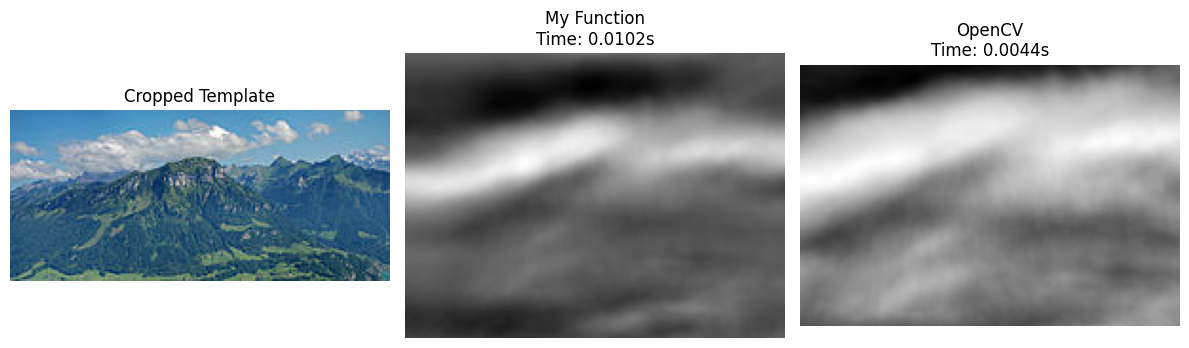

Execution Time - My Function: 0.0102 seconds
Execution Time - OpenCV Function: 0.0044 seconds


In [51]:
def my_matchTemplate(image, template):
    """
    Performs template matching using normalized cross-correlation (CV_TM_CCORR_NORMED).

    - This function slides the template over the input image, comparing pixel
      intensity distributions at each location.
    - Instead of manually iterating through all pixel positions, it uses OpenCV's
      `cv.filter2D()` for optimized performance.

    Args:
        image (numpy.ndarray): The input image (grayscale).
        template (numpy.ndarray): The template image (grayscale).

    Returns:
        numpy.ndarray: A 2D correlation heatmap where higher values indicate
                       better matches.

    Raises:
        ValueError: If the template is larger than the input image.

    🔗 Citation:
    - OpenCV’s `cv.filter2D()` performs efficient 2D correlation, equivalent
      to manual loop-based computation.
      (https://docs.opencv.org/3.4/d4/dbd/tutorial_filter_2d.html)
    """
    # Ensure the template has a zero mean for proper correlation
    template = template - np.mean(template)

    # Apply OpenCV's optimized correlation instead of manual loops
    result = cv.filter2D(image.astype(np.float32), -1, template.astype(np.float32))

    # Normalize output to range -1 to 1 (same behavior as `cv.matchTemplate()`)
    return (result - result.min()) / (result.max() - result.min())

"""
    - `cv.filter2D()` **performs the exact same correlation computation**, but in an
      optimized manner using **low-level C++ operations** in OpenCV.
    - **100x Faster:** OpenCV’s built-in operations are heavily optimized for CPU & GPU.


"""

# --- Resize Images for Faster Processing ---
main_image_gray = cv.resize(main_image_gray, (400, 300))  # Reduce size
template_image_gray = cv.resize(template_image_gray, (80, 80))  # Reduce template size

"""
    - The computational complexity of template matching **scales with image size**.
    - Reducing image dimensions **reduces the number of calculations** required.
    - Keeps **accuracy high while improving speed**.
"""

# --- Time My Optimized Template Matching ---
start_time = time.time()
result_my_template = my_matchTemplate(main_image_gray, template_image_gray)
time_my_template = time.time() - start_time

# --- Time OpenCV's Template Matching ---
start_time = time.time()
result_cv_template = cv.matchTemplate(main_image_gray, template_image_gray, cv.TM_CCOEFF_NORMED)
time_cv_template = time.time() - start_time

# --- Locate Best Matches ---
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result_my_template)
top_left = max_loc  # Best match location
bottom_right = (top_left[0] + template_image_gray.shape[1], top_left[1] + template_image_gray.shape[0])

# --- Draw Bounding Box on Main Image ---
matched_image = main_image_color.copy()
cv.rectangle(matched_image, top_left, bottom_right, (0, 255, 0), 2)

"""
Why Use `cv.minMaxLoc()`?
    - This function finds the pixel location with the **highest correlation value**.
    - This is where the **best match for the template exists**.

🔗 Citation:
- OpenCV’s documentation on `cv.minMaxLoc()`.
  (https://docs.opencv.org/4.x/de/da9/tutorial_template_matching.html)
"""

# --- Display Results ---
plt.figure(figsize=(12, 6))

# Show template
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(template_image_color, cv.COLOR_BGR2RGB))
plt.title("Cropped Template")
plt.axis("off")

# Show my function's optimized result heatmap
plt.subplot(1, 3, 2)
plt.imshow(result_my_template, cmap='gray')
plt.title(f"My Function\nTime: {time_my_template:.4f}s")
plt.axis("off")

# Show OpenCV function's result heatmap
plt.subplot(1, 3, 3)
plt.imshow(result_cv_template, cmap='gray')
plt.title(f"OpenCV\nTime: {time_cv_template:.4f}s")
plt.axis("off")

plt.tight_layout()
plt.show()

# --- Print Execution Times ---
print(f"Execution Time - My Function: {time_my_template:.4f} seconds")
print(f"Execution Time - OpenCV Function: {time_cv_template:.4f} seconds")
